In [1]:
!pip install -U -q PyDrive
!pip install sklearn

  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /content/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1Eu4wZqlZUe_zCPZ6r3Zk3kkwovwwW197' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


#with open(fname, 'r') as f:
#  print(f.read())

title: Ecommerce Customers, id: 12v6LWCDee1DYuZ744wEdbtpFO3AOq_qD
downloading to /content/data/Ecommerce Customers
title: USA_Housing.csv, id: 1T7wpMQn2hCNebTLhUpcIaKTsz2WXB-mY
downloading to /content/data/USA_Housing.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/data/Ecommerce Customers')

In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [0]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

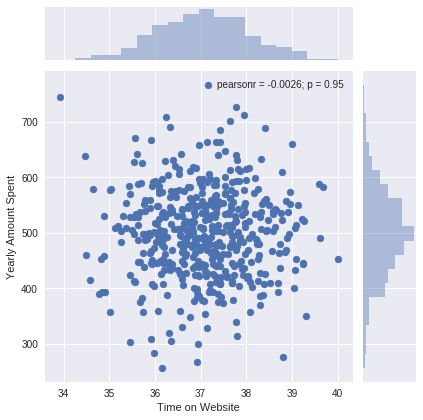

In [10]:
sns.jointplot(X['Time on Website'],y)

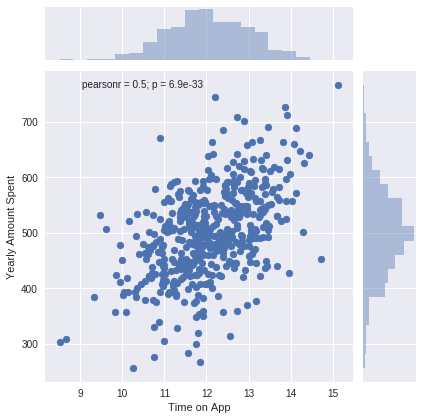

In [11]:
sns.jointplot(X['Time on App'],y)

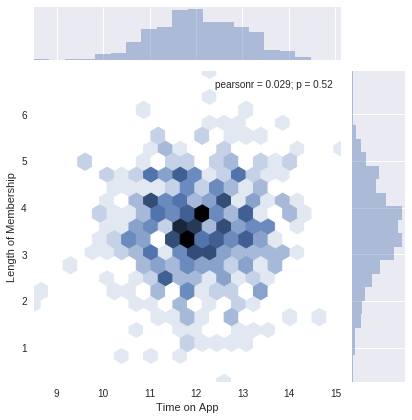

In [12]:
sns.jointplot(X['Time on App'], X['Length of Membership'], kind="hex")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_

array([25.11463945, 39.0221878 ,  0.76713598, 62.24728656])

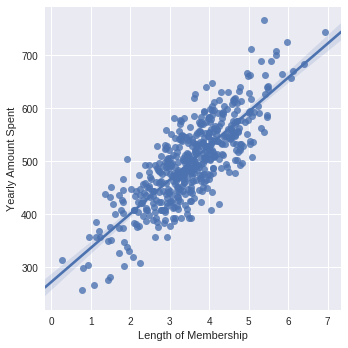

In [14]:
sns.lmplot(y='Yearly Amount Spent',x='Length of Membership',data=df)

In [0]:
predictions = lm.predict(X_test)

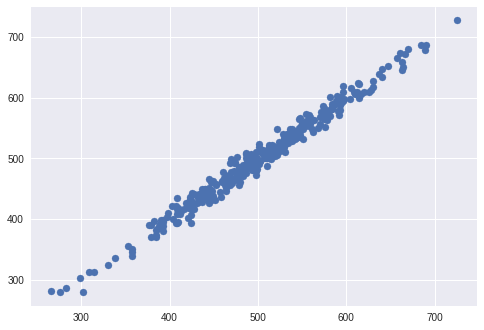

In [16]:
plt.scatter(y_test,predictions)

In [17]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  8.27722410558532
MSE:  109.36337929836618
RMSE:  10.457694741116045


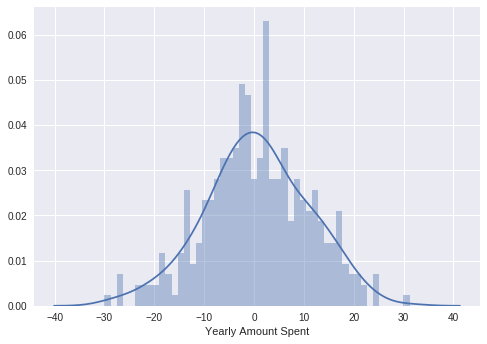

In [18]:
sns.distplot((y_test-predictions),bins=50)

In [20]:
#@title Default title text
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.114639
Time on App,39.022188
Time on Website,0.767136
Length of Membership,62.247287


In [0]:
#@title Problem set Given in Udemy { vertical-output: true }
#This whole is a exercise solved for linear regression model using sklearn